## Construct Baseline
Using preprocessed sub-grids data and functions, find the baseline for whole travel space

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time

from itertools import permutations
from functions import *

np.random.seed(12345)

In [2]:
PATH_START = (121.46, 31.22) #(CNWGQ: 31.22N, 121.46E) 
PATH_END = (174.77, -36.87) #(NZAKL: 36.87S 174.77E)
THRESHOLD = 0.5

In [3]:
file_list = os.listdir('out')
file_list.sort()

In [4]:
grid_list = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        with open(os.path.join('out', file_name), 'r') as f:
            grid = np.genfromtxt(f, delimiter=',')
            grid_list.append(grid)

In [5]:
grid_list_reshape = []
for grid in grid_list:
    if len(grid.shape) == 1:
        grid = grid.reshape(-1,1)
    grid_list_reshape.append(grid)

grid_list = grid_list_reshape

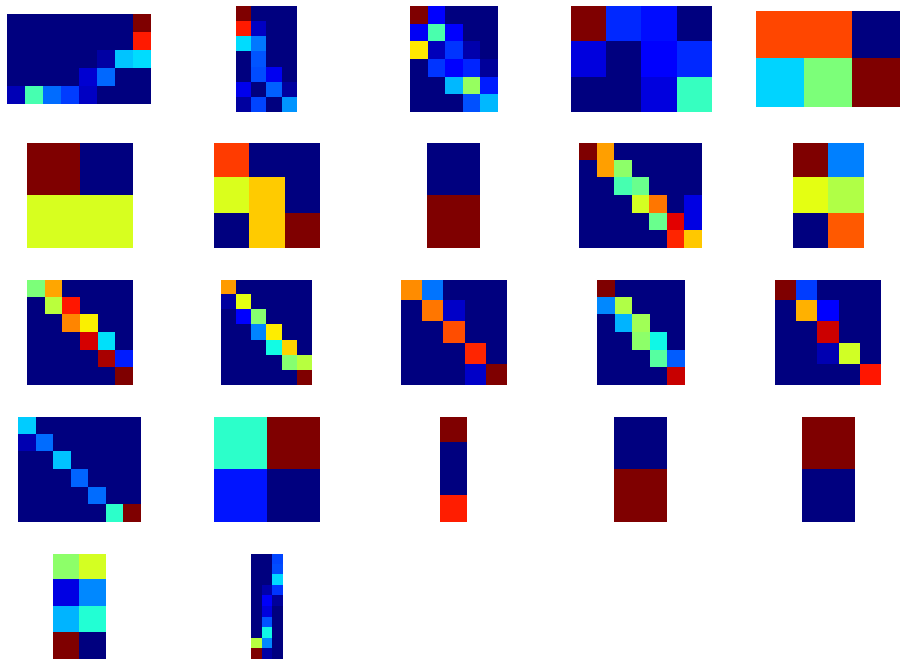

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(16,12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

i = 0
for row in ax:
    for col in row:
        if i == len(grid_list):
            col.plot()
            col.axis('off')
            continue
        col.imshow(grid_list[i], cmap='jet')
        #for (j,i),label in np.ndenumerate(grid_list[i]):
        #    col.text(i,j,int(label),ha='center',va='center')
        col.axis('off')
        i += 1

In [7]:
import pickle

out_name = 'out/grid_info_list'
with open(out_name, 'rb') as f:
    grid_info_list = pickle.load(f)

In [8]:
def get_n_routes(grid):
    n_routes = math.factorial(grid.shape[0]-1+grid.shape[1]-1)/math.factorial(grid.shape[0]-1)/math.factorial(grid.shape[1]-1)
    return int(n_routes)

In [9]:
for grid_info, grid in zip(grid_info_list, grid_list):
    print(grid_info, grid.shape, get_n_routes(grid))

[0, 4, 7, 0, 1, -1] (5, 8) 330
[7, 0, 10, 6, 1, 1] (7, 4) 84
[10, 6, 14, 11, 1, 1] (6, 5) 126
[14, 11, 17, 13, 1, 1] (3, 4) 10
[17, 13, 19, 14, 1, 1] (2, 3) 3
[19, 14, 20, 15, 1, 1] (2, 2) 2
[20, 15, 22, 17, 1, 1] (3, 3) 6
[22, 17, 22, 18, -1, 1] (2, 1) 1
[22, 18, 28, 23, 1, 1] (6, 7) 462
[28, 23, 29, 25, 1, 1] (3, 2) 3
[29, 25, 34, 30, 1, 1] (6, 6) 252
[34, 30, 39, 36, 1, 1] (7, 6) 462
[39, 36, 43, 40, 1, 1] (5, 5) 70
[43, 40, 47, 45, 1, 1] (6, 5) 126
[47, 45, 51, 49, 1, 1] (5, 5) 70
[51, 49, 57, 54, 1, 1] (6, 7) 462
[57, 54, 56, 55, -1, 1] (2, 2) 2
[56, 55, 56, 58, -1, 1] (4, 1) 1
[56, 58, 56, 59, -1, 1] (2, 1) 1
[56, 59, 56, 60, -1, 1] (2, 1) 1
[56, 60, 55, 63, -1, 1] (4, 2) 4
[55, 63, 53, 72, -1, 1] (10, 3) 55


[0, 4, 7, 0, 1, -1] (5, 8) 330
time (s): 1.9882041639648378


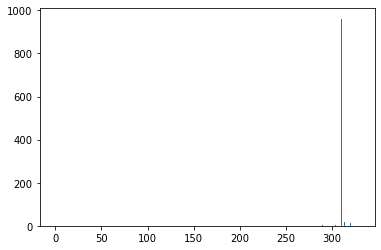

[7, 0, 10, 6, 1, 1] (7, 4) 84
time (s): 0.44532157201319933


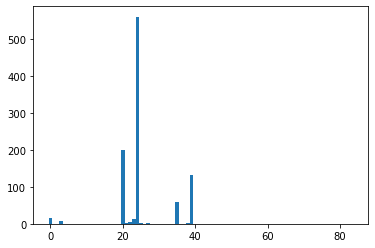

[10, 6, 14, 11, 1, 1] (6, 5) 126
time (s): 0.6609733835794032


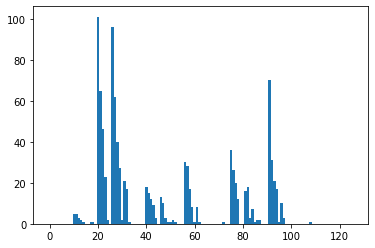

[14, 11, 17, 13, 1, 1] (3, 4) 10
time (s): 0.06808652589097619


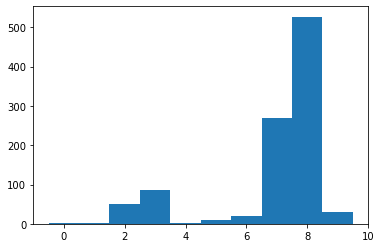

[17, 13, 19, 14, 1, 1] (2, 3) 3
time (s): 0.026911790017038584


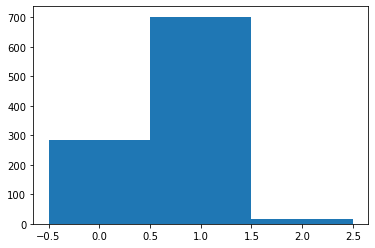

[19, 14, 20, 15, 1, 1] (2, 2) 2
time (s): 0.022848422173410654


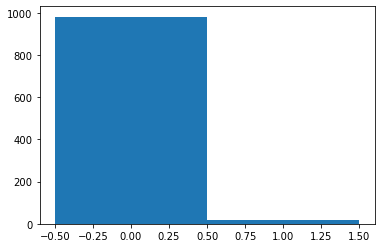

[20, 15, 22, 17, 1, 1] (3, 3) 6
time (s): 0.03998405300080776


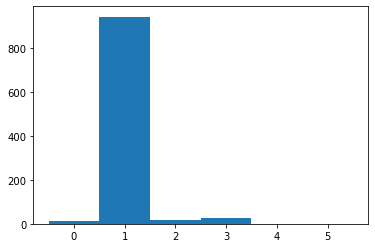

[22, 17, 22, 18, -1, 1] (2, 1) 1
time (s): 0.019678307697176933


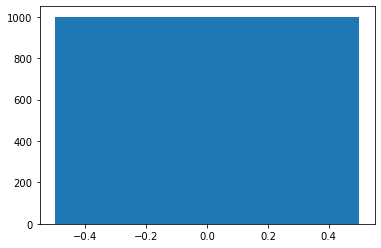

[22, 18, 28, 23, 1, 1] (6, 7) 462
time (s): 2.577626919839531


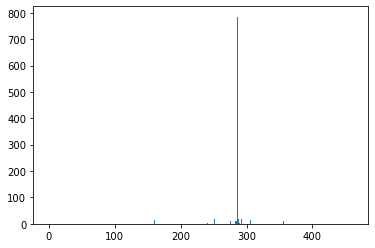

[28, 23, 29, 25, 1, 1] (3, 2) 3
time (s): 0.028094314970076084


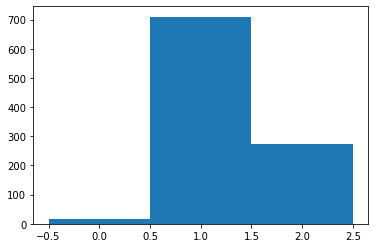

[29, 25, 34, 30, 1, 1] (6, 6) 252
time (s): 1.3299149773083627


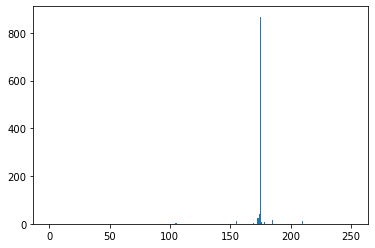

[34, 30, 39, 36, 1, 1] (7, 6) 462
time (s): 2.566858348902315


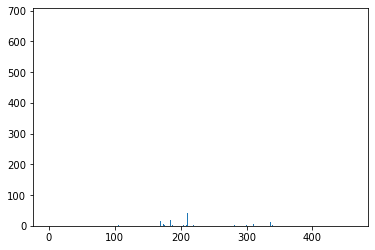

[39, 36, 43, 40, 1, 1] (5, 5) 70
time (s): 0.3488884321413934


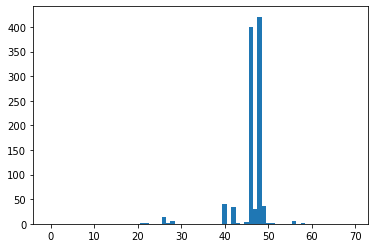

[43, 40, 47, 45, 1, 1] (6, 5) 126
time (s): 0.6522596287541091


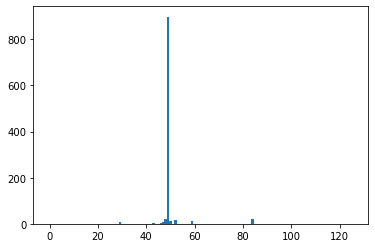

[47, 45, 51, 49, 1, 1] (5, 5) 70
time (s): 0.3584917620755732


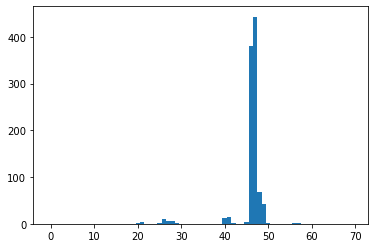

[51, 49, 57, 54, 1, 1] (6, 7) 462
time (s): 2.6401298101991415


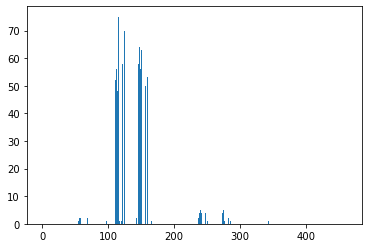

[57, 54, 56, 55, -1, 1] (2, 2) 2
time (s): 0.027424158062785864


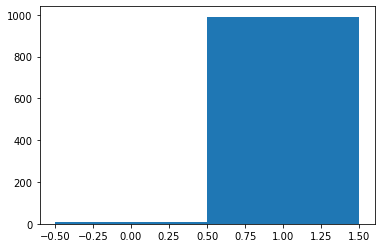

[56, 55, 56, 58, -1, 1] (4, 1) 1
time (s): 0.02353913802653551


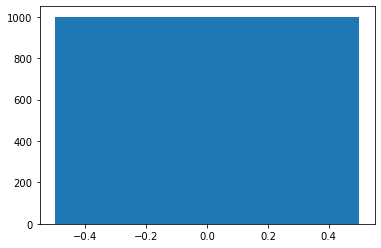

[56, 58, 56, 59, -1, 1] (2, 1) 1
time (s): 0.02440957399085164


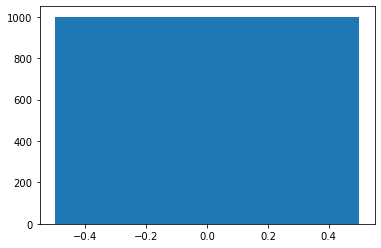

[56, 59, 56, 60, -1, 1] (2, 1) 1
time (s): 0.019616228993982077


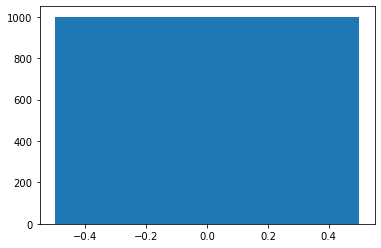

[56, 60, 55, 63, -1, 1] (4, 2) 4
time (s): 0.033333295956254005


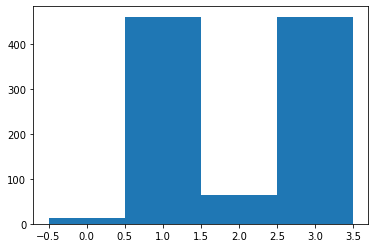

[55, 63, 53, 72, -1, 1] (10, 3) 55
time (s): 0.3265358586795628


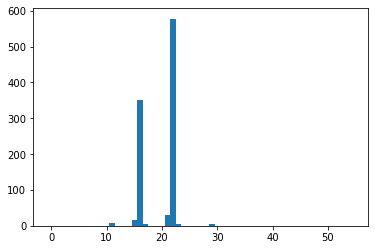

In [10]:
boot_sample_list = []
best_route_list = []
computation_time_list = []

for (x_s, y_s, x_e, y_e, x_d, y_d), X in zip(grid_info_list, grid_list):
    print([x_s, y_s, x_e, y_e, x_d, y_d], X.shape, get_n_routes(X))
    start_time = time.perf_counter()
    
    if x_d == -1:
        X = np.fliplr(X)
    if y_d == -1:
        X = np.flipud(X)
        
    unique_routes = get_unique_routes(X)
    unique_paths = get_path_from_routes(X, unique_routes)
    boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)
    
    boot_sample_out = []
    for idx in range(0,len(unique_routes)):
        boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
    boot_sample_out = np.vstack(boot_sample_out)
    boot_sample_list.append(boot_sample_out)
    
    #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
    best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
    best_route_list.append(best_route)
    
    print('time (s): {}'.format(time.perf_counter()-start_time))
    computation_time_list.append([get_n_routes(X), time.perf_counter()-start_time])
    
    plt.bar(boot_sample_out[:,0], boot_sample_out[:,1], width=1)
    plt.show()

In [11]:
out_name = 'out/best_route_list'
with open(out_name, 'wb') as f:
    pickle.dump(best_route_list, f)

In [12]:
out_name = 'out/boot_sample_list'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_list, f)